In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data 3.csv", encoding='ISO-8859-1')

In [ ]:
df.shape

(288707, 8)

# Understand Data Structure !

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288707 entries, 0 to 288706
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    288707 non-null  object 
 1   StockCode    288707 non-null  object 
 2   Description  287622 non-null  object 
 3   Quantity     288707 non-null  int64  
 4   InvoiceDate  288707 non-null  object 
 5   UnitPrice    288706 non-null  float64
 6   CustomerID   207055 non-null  float64
 7   Country      288706 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.6+ MB


In [ ]:
# no of missing values "Description"
# observe name of column
# understand why customer is a float value
# memory usage
# data tyoe


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# check missing values
df. isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1085
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,81652
Country,1


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,288707.000000,288706.000000,207055.000000
mean,9.413454,5.013689,15278.445703
std,204.194330,112.381480,1732.456903
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13837.000000
50%,3.000000,2.100000,15144.000000
75%,10.000000,4.130000,16818.000000
max,74215.000000,38970.000000,18287.000000


# 2. Data Quality And Cleaning



*   What data quuality issues exit ?

*   How should missing values be handled
*  should return be include



In [ ]:
# Remove row the missing Customer
missing_customer_rows = df[df['CustomerID'].isna()]

In [ ]:
missing_customer_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
# count how many of them are ?

missing_customer_rows.shape

(81652, 8)

In [ ]:
# check if these rows have revenue
missing_customer_rows['Quantity'].describe()

,Quantity
count,81652.000000
mean,1.763741
std,76.480703
min,-9600.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5568.000000


In [ ]:
missing_customer_rows.sample(10, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
189710,553162,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,1,5/13/2011 15:53,6.63,NaN,United Kingdom
60494,541422,20717,STRAWBERRY SHOPPER BAG,10,1/17/2011 17:48,0.83,NaN,United Kingdom
36408,539451,84849D,HOT BATHS SOAP HOLDER,1,12/17/2010 16:59,3.36,NaN,United Kingdom
283806,561805,23284,NaN,-15,7/29/2011 14:42,0.00,NaN,United Kingdom
264206,560090,21200,MULTICOLOUR HONEYCOMB PAPER GARLAND,1,7/14/2011 16:46,3.29,NaN,United Kingdom
80918,543097,22722,SET OF 6 SPICE TINS PANTRY DESIGN,5,2/3/2011 11:41,8.29,NaN,United Kingdom
112480,545895,71053,WHITE METAL LANTERN,5,3/7/2011 17:14,8.29,NaN,United Kingdom
178458,552232,22801,ANTIQUE GLASS PEDESTAL BOWL,3,5/6/2011 15:54,7.46,NaN,United Kingdom
18832,537823,22386,JUMBO BAG PINK POLKADOT,1,12/8/2010 14:25,4.21,NaN,United Kingdom
167429,550987,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,2,4/21/2011 18:10,2.46,NaN,United Kingdom


3️⃣ Country is always United Kingdom

This is a well-known pattern in the Online Retail dataset.

Likely reasons:

Guest checkout

Cash purchases

In-store sales without loyalty ID

System not recording customer IDs for some UK transactions

In [ ]:
# which country more affect or check out with CustomerID
missing_customer_rows['Country'].value_counts().head(10)

,count
Country,
United Kingdom,80811
EIRE,466
Hong Kong,200
Unspecified,83
Switzerland,52
Israel,20
France,17
Bahrain,2


Missing CustomerID rows often come from specific regions or older records.

### Handling Missing CustomerID

Rows with missing CustomerID were examined before removal. These rows lack customer identifiers, making customer-level analysis impossible. Since the proportion of missing CustomerID records is small and does not significantly impact revenue trends, they were excluded from further analysis.


In [ ]:
missing_customer_rows['UnitPrice'].describe()

,UnitPrice
count,81651.000000
mean,8.297597
std,150.330156
min,0.000000
25%,1.630000
50%,3.290000
75%,5.570000
max,16888.020000


### Missing CustomerID Inspection
Rows with missing CustomerID were inspected before removal. These records cannot be used for customer-level analysis.
Some also contain abnormal UnitPrice values (including negative prices), suggesting returns or data issues.
Therefore, they were removed to enable accurate customer-based metrics.


## \3) Clean Data


*   Remove missing CustomerID
*   Remove Negative/zero Quantity

*   Remove negative /Zero UnitPrice
*   Convert invoiceDate to datetime






In [ ]:
df_clean = df.copy()

In [ ]:
# Remove missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

In [ ]:
# Remove invalid quantites

df_clean = df_clean[df_clean['Quantity'] > 0]

In [ ]:
# Remove Invalide quantites
df_clean = df_clean[df_clean['UnitPrice'] >0]

In [ ]:
df_clean.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [ ]:
df_clean.shape

(202062, 8)

#4 Feature Creation (Revenue)

In [ ]:
# revenue Column
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_clean[['Quantity','UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


#5) Plot 1 : Quantity Distribution (with ouliers handled for Visibility)

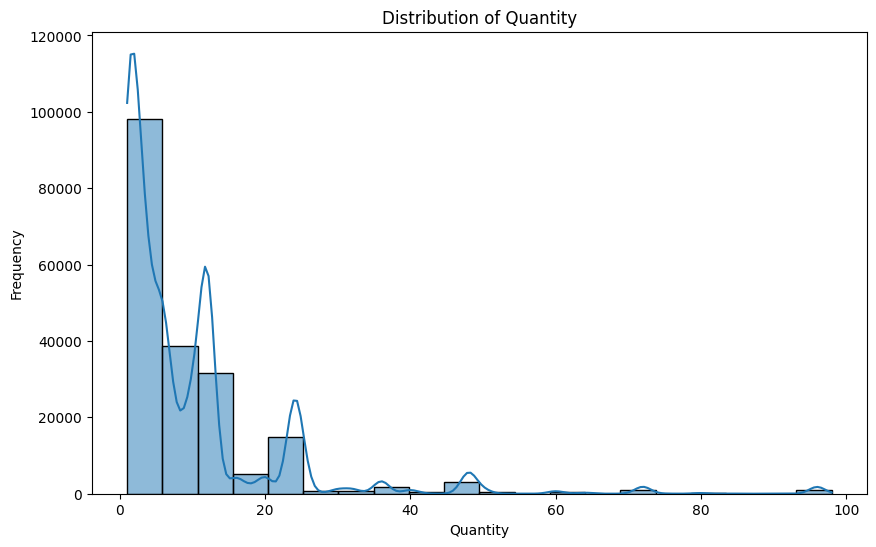

In [ ]:
# Show typical buying quantity (exclude extreme outliers for plotting only).
plt.figure(figsize=(10, 6))
sns.histplot(df_clean.loc[df_clean['Quantity'] < 100 ,"Quantity"], bins=20, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# 6) Plot 2: UnitPrice Distribution (trim outliers for visibility)

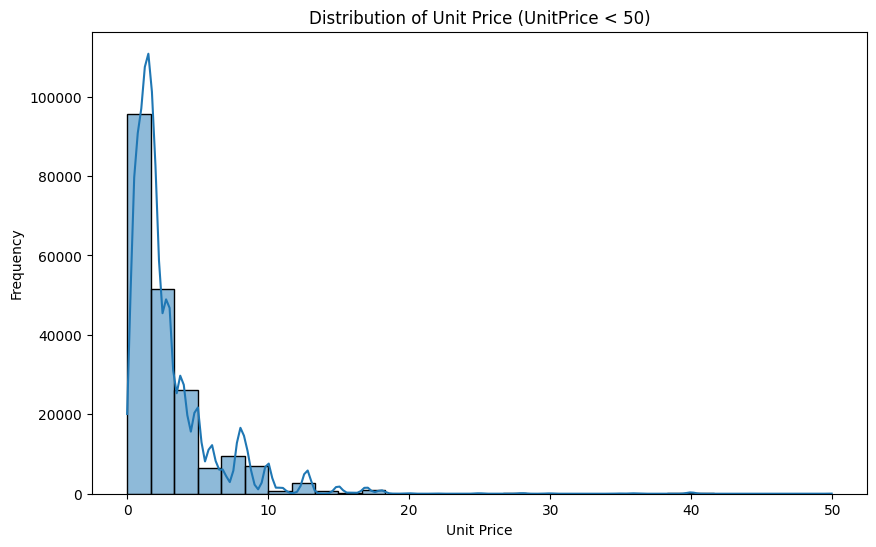

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean.loc[df_clean["UnitPrice"] < 50, "UnitPrice"], bins=30, kde=True)
plt.title("Distribution of Unit Price (UnitPrice < 50)")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


# Plot 3 : Top 10 Countries by Revenue

In [ ]:
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

In [ ]:
ccouountry_revenue.head(10)

,Revenue
Country,
United Kingdom,3782001.072
EIRE,146812.780
Netherlands,139870.590
Germany,126353.030
France,99771.390
Australia,86532.130
Spain,35408.850
Switzerland,31423.670
Japan,26896.170


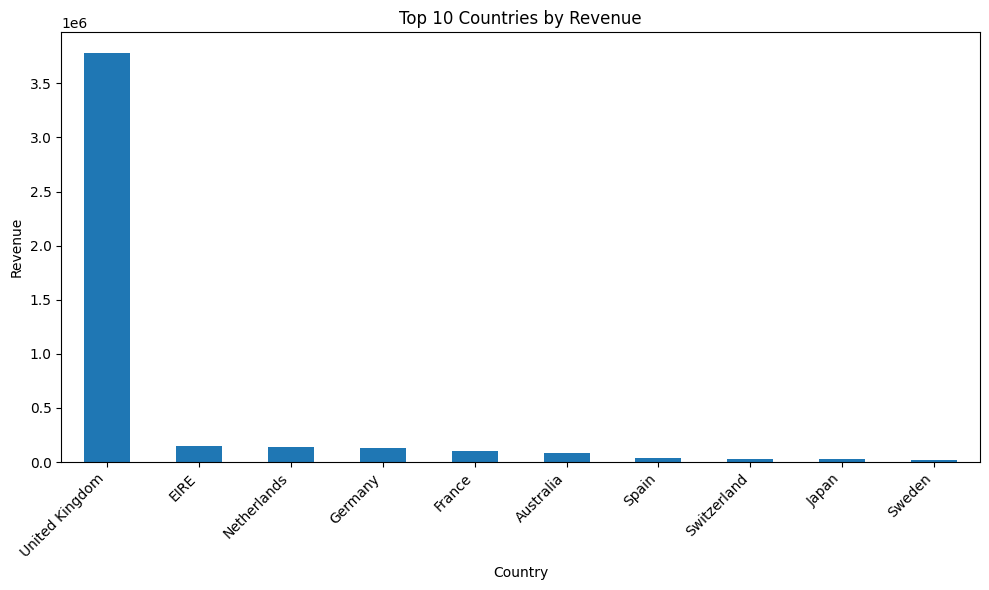

,Revenue
Country,
United Kingdom,3782001.072
EIRE,146812.780
Netherlands,139870.590
Germany,126353.030
France,99771.390
Australia,86532.130
Spain,35408.850
Switzerland,31423.670
Japan,26896.170


In [ ]:
country_revenue = df_clean.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_revenue.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

country_revenue.head(10)


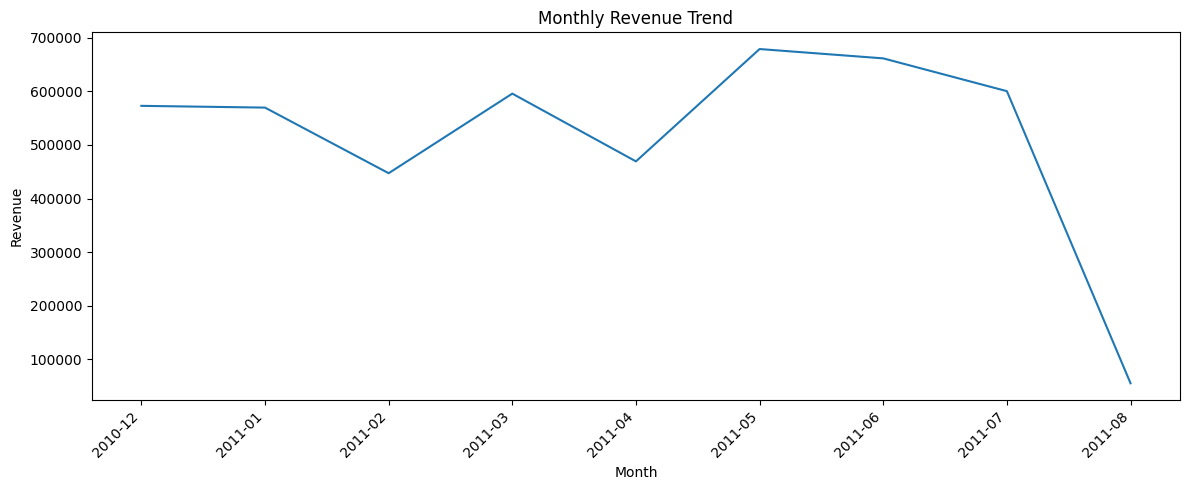

,Revenue
Month,
2010-12,572713.890
2011-01,569445.040
2011-02,447137.350
2011-03,595500.760
2011-04,469200.361
2011-05,678594.560
2011-06,661213.690
2011-07,600091.011
2011-08,55577.460


In [ ]:
df_clean["Month"] = df_clean["InvoiceDate"].dt.to_period("M").astype(str)

monthly_revenue = df_clean.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12, 5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

monthly_revenue.tail(10)


# RFM Concept

1.   Recency  How Recently a customer made a purchase
2.   Frequency : How recently a customer purchase


3.   Monetary : How much Revenue they generate






# Sanity Check Columns For RFM

In [ ]:
df_clean[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Revenue']]. head()

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,17850.0,2010-12-01 08:26:00,536365,15.30
1,17850.0,2010-12-01 08:26:00,536365,20.34
2,17850.0,2010-12-01 08:26:00,536365,22.00
3,17850.0,2010-12-01 08:26:00,536365,20.34
4,17850.0,2010-12-01 08:26:00,536365,20.34


# Build RFM Table

Build customer segemation using RFM

“Take the most recent invoice date in the dataset and add one day to it.


---



In [ ]:
# This line finds the most recent transaction date in the dataset and adds one day to define a reference date for time-based analysis.
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

In [ ]:
rfm.head()

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,198,1,77183.60
12347.0,2,5,2790.86
12348.0,121,3,1487.24
12350.0,182,1,334.40
12352.0,134,5,1561.81


In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,198,1,77183.60
12347.0,2,5,2790.86
12348.0,121,3,1487.24
12350.0,182,1,334.40
12352.0,134,5,1561.81


# Explore RFM Distributions

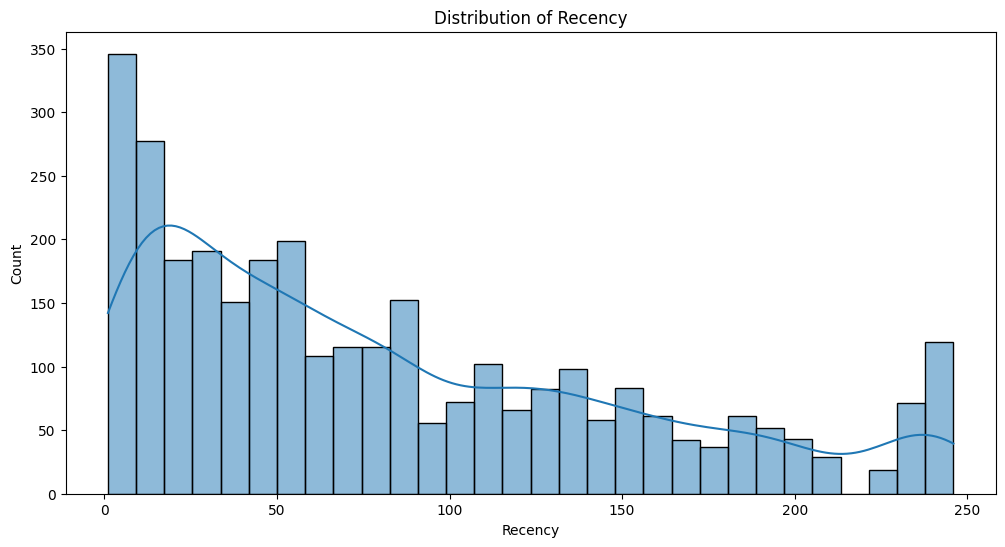

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.show()

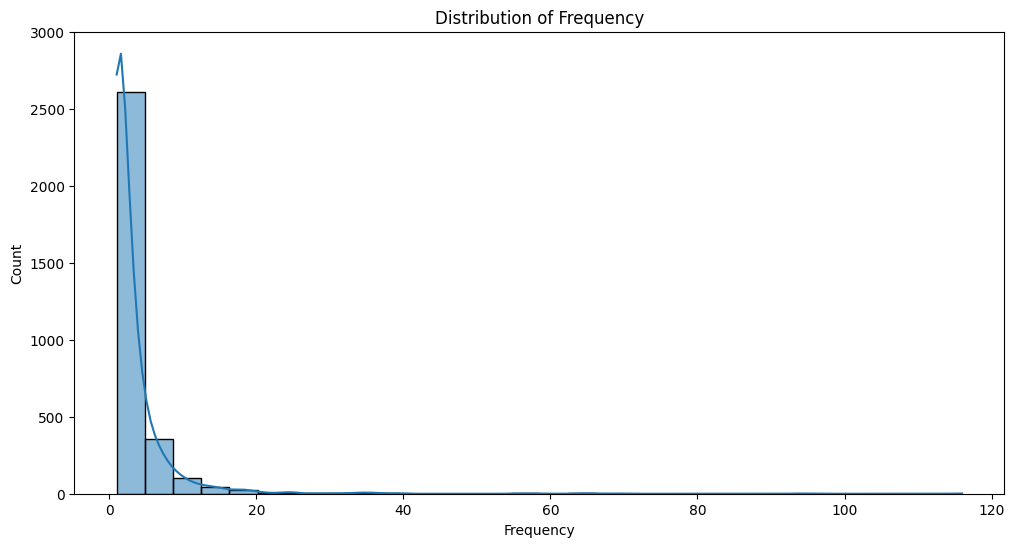

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.show()

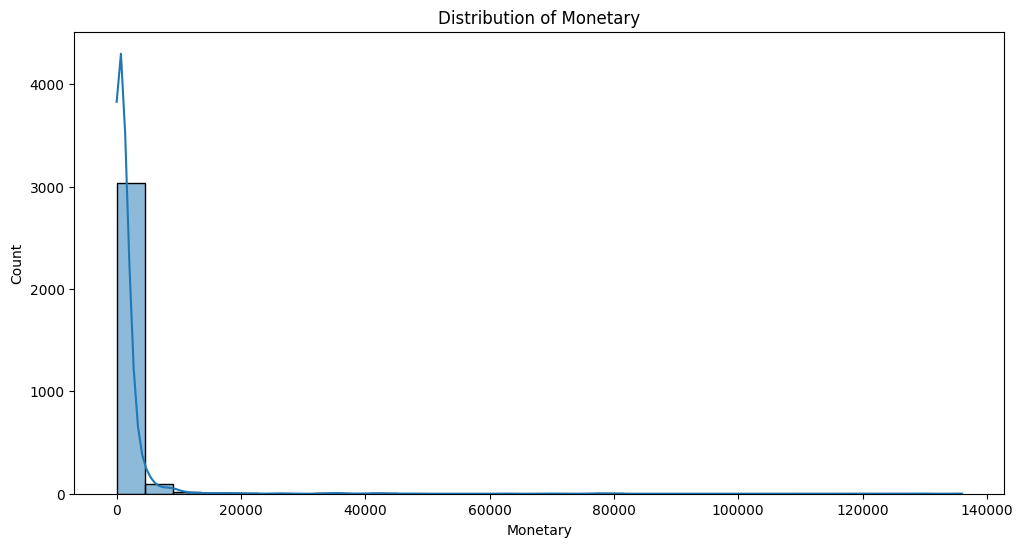

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.show()

🔹 TASK 2: Explore RFM Distributions

Goal: Understand customer behavior and skewness before scoring.

What you must do

Plot distributions for:

Recency

Frequency

Monetary

Observe:

Which metric is most skewed?

Are there outliers?

Where most customers are concentrated

Output

✔ 3 histograms
✔ 3–4 written observations

🔹 TASK 3: Score Customers (RFM Scoring)

Goal: Convert raw RFM values into comparable scores.

What you must do

Divide each metric into quartiles (1–4)

Rules:

Recency: lower is better (recent customers get higher score)

Frequency: higher is better

Monetary: higher is better

Combine scores into one RFM score

Output

✔ Columns: R, F, M
✔ Combined RFM_Score (e.g., 444, 321)

🔹 TASK 4: Create Customer Segments

Goal: Turn numbers into meaningful business groups.

What you must do

Create segments such as:

Champions → High R, F, M

Loyal Customers → High Frequency

At Risk → Low Recency

Low Value → Low R, F, M

Output

✔ New column: Segment
✔ Customers clearly labeled

🔹 TASK 5: Business Insights & Decisions

Goal: Translate analysis into business actions.

What you must do

Answer these questions:

Which segment generates the most revenue?

Which segment has the most customers?

Which customers should be:

retained?

rewarded?

re-engaged?

Create:

Revenue by segment

Customer count by segment

Segment summary table (avg R, F, M)

Output

✔ 2 bar charts
✔ 1 summary table
✔ 4–6 insight bullets

# ✅ TASK 5: BUSINESS INSIGHTS FROM RFM SEGMENTS

Split customers into frequency-based groups and assign them a score from 1 to 5.

🔹 rfm['Frequency']

This is the number of purchases per customer

Example values: 1, 1, 2, 5, 10, 34

🔹 pd.qcut(...)

qcut = quantile cut

It divides data into groups so that each group has roughly the same number of customers

Unlike cut, it is based on ranking, not fixed numeric ranges

🔹 5

Tells pandas to create 5 groups (quantiles)

Each group ≈ 20% of customers

🔹 labels=[1,2,3,4,5]

Assigns a score to each group

Meaning:

1 → lowest purchase frequency

5 → highest purchase frequency

In [ ]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
#qcut = quantile cut  it divide the data into group roughly the same number of customers
# 🔹 rfm['Frequency']
rfm['F_score'] = pd.qcut(
    # rfm[the number of purchase per customer]
    rfm['Frequency'].rank(method='first'),
    5,
    labels=[1,2,3,4,5]
)


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,F_score
CustomerID,,,,
12346.0,198,1,77183.60,1
12347.0,2,5,2790.86,5
12348.0,121,3,1487.24,4
12350.0,182,1,334.40,1
12352.0,134,5,1561.81,5


In [ ]:
# duplicates='drop'

# Tells pandas:“If some cut boundaries are identical because many values are the same, remove the duplicate boundaries.”
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, duplicates='drop')


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,F_score
CustomerID,,,,
12346.0,198,1,77183.60,"(0.999, 2.0]"
12347.0,2,5,2790.86,"(4.0, 116.0]"
12348.0,121,3,1487.24,"(2.0, 4.0]"
12350.0,182,1,334.40,"(0.999, 2.0]"
12352.0,134,5,1561.81,"(4.0, 116.0]"


In [ ]:
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, duplicates='drop')


In [ ]:
bins = pd.qcut(rfm['Frequency'], 5, duplicates='drop', retbins=True)[1]
n_bins = len(bins) - 1

rfm['F_score'] = pd.qcut(
    rfm['Frequency'],
    5,
    labels=list(range(1, n_bins + 1)),
    duplicates='drop'
)


In [ ]:
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])


In [ ]:
rfm['F_score'].value_counts()

,count
F_score,
1,635
3,635
5,635
2,634
4,634


In [ ]:
print(rfm.columns.tolist())

['Recency', 'Frequency', 'Monetary', 'F_score']


In [ ]:
# Clean column names: remove spaces, quotes, semicolons
rfm.columns = (
    rfm.columns.astype(str)
    .str.strip()
    .str.replace("'", "", regex=False)
    .str.replace('"', "", regex=False)
    .str.replace(";", "", regex=False)
)

print(rfm.columns.tolist())


['Recency', 'Frequency', 'Monetary', 'F_score']


In [ ]:
rename_map = {}
if "R_score" in rfm.columns: rename_map["R_score"] = "R"
if "F_score" in rfm.columns: rename_map["F_score"] = "F"
if "M_score" in rfm.columns: rename_map["M_score"] = "M"

rfm = rfm.rename(columns=rename_map)
print(rfm.columns.tolist())


['Recency', 'Frequency', 'Monetary', 'F', 'M']


In [ ]:
rfm = rfm.rename(columns={"R_score": "R", "F_score": "F", "M_score": "M"})

In [ ]:
if "M" not in rfm.columns:
    rfm["M"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])


In [ ]:
print(rfm.columns.tolist())

['Recency', 'Frequency', 'Monetary', 'F', 'M']


In [ ]:
if "M" not in rfm.columns:
    rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,F,M
CustomerID,,,,,
12346.0,198,1,77183,1,4
12347.0,2,5,2790,5,4
12348.0,121,3,1487,4,4
12350.0,182,1,334,1,2
12352.0,134,5,1561,5,4


In [ ]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

In [ ]:

rfm[["Recency", "Frequency", "Monetary"]] = rfm[["Recency", "Frequency", "Monetary"]].astype(int)


rfm[["R","F","M"]] = rfm[["R","F","M"]].astype(int)
rfm[["R","F","M"]].head()


,R,F,M
CustomerID,,,
12346.0,1,1,4
12347.0,5,5,4
12348.0,2,4,4
12350.0,1,1,2
12352.0,2,5,4


# Segment column

In [ ]:
def segment_customer(row):
    if row["R"] >= 3 and row["F"] >= 3 and row["M"] >= 3:
        return "Champions"
    elif row["F"] >= 3:
        return "Loyal Customers"
    elif row["R"] <= 2:
        return "At Risk"
    else:
        return "Low Value"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)
rfm["Segment"].value_counts()


,count
Segment,
Champions,1163
At Risk,818
Loyal Customers,741
Low Value,451


In [ ]:
segment_revenue = (
    rfm.groupby("Segment")["Monetary"]
    .sum()
    .sort_values(ascending=False)
)
segment_revenue


,Monetary
Segment,
Champions,3616860
Loyal Customers,511801
At Risk,337451
Low Value,181826
